In [1]:
from util.log import plot_ts_result
from util.process import MyDataset, Modeling
from util.model import TransformerModel, LSTM

import numpy as np
import pandas as pd

df = pd.read_csv("data/merged.csv") 


In [2]:
x_cols = ["EXTN_TPRT", "INNER_HMDT_1"]
y_cols = ["INNER_TPRT_1"]
data = MyDataset(df, x_cols, y_cols)
train_loader, test_loader = data.preprocessing(train_ratio=0.8)

Transformer

In [3]:
from util.model import TransformerModel
modeling = Modeling(model=TransformerModel, 
                    data=data, lr=0.001)

Using device: cuda


/home/agtech-research/문서/tomato2023/lib/python3.8/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [4]:
modeling.train(
    epochs=100,
    train_loader=train_loader,
    test_loader=test_loader,
)

Epoch 10/100, Training Loss: 6.428173542022705, Validation Loss: 7.51710103
Epoch 20/100, Training Loss: 6.985617637634277, Validation Loss: 8.19083893
Epoch 30/100, Training Loss: 7.21863317489624, Validation Loss: 6.13494280
Epoch 40/100, Training Loss: 2.807730197906494, Validation Loss: 6.38471863
Epoch 50/100, Training Loss: 8.214632034301758, Validation Loss: 8.05881211
Epoch 60/100, Training Loss: 4.648505210876465, Validation Loss: 6.14683000
Epoch 70/100, Training Loss: 5.499163627624512, Validation Loss: 8.69966071
Epoch 80/100, Training Loss: 7.08738899230957, Validation Loss: 6.40157181
Epoch 90/100, Training Loss: 3.6483330726623535, Validation Loss: 6.29484245
Epoch 100/100, Training Loss: 6.164138317108154, Validation Loss: 9.46289451


explained_variance:  0.7267
r2:  0.6404
MAE:  2.4184
MSE:  9.4629
RMSE:  3.0762


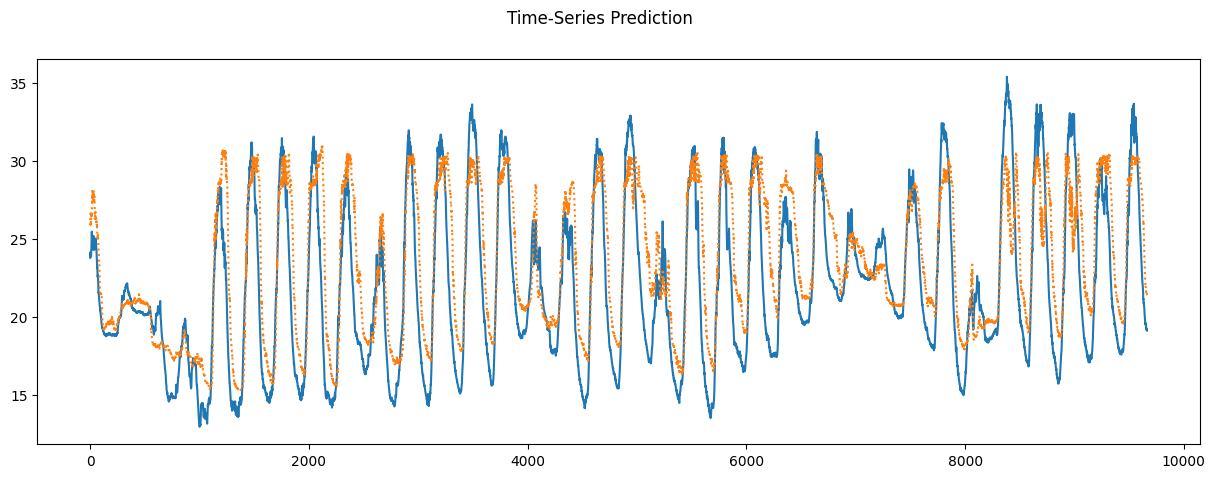

In [5]:
true_val, pred_val = modeling.eval(test_loader, data.y_test)
plot_ts_result(true_val, pred_val)

In [6]:
del modeling

LSTM

In [8]:
modeling = Modeling(model=LSTM, 
                    data=data, lr=0.001)

Using device: cuda


In [9]:
modeling.train(
    epochs=100,
    train_loader=train_loader,
    test_loader=test_loader,
)

Epoch 10/100, Training Loss: 13.932788848876953, Validation Loss: 41.96104400
Epoch 20/100, Training Loss: 5.694218635559082, Validation Loss: 12.13407961
Epoch 30/100, Training Loss: 4.214547157287598, Validation Loss: 9.27003999
Epoch 40/100, Training Loss: 3.1642208099365234, Validation Loss: 7.66098024
Epoch 50/100, Training Loss: 4.571559906005859, Validation Loss: 8.24277734
Epoch 60/100, Training Loss: 6.998621940612793, Validation Loss: 7.10962004
Epoch 70/100, Training Loss: 4.762828826904297, Validation Loss: 6.32258516
Epoch 80/100, Training Loss: 5.294873237609863, Validation Loss: 6.79293187
Epoch 90/100, Training Loss: 4.832296371459961, Validation Loss: 5.92377481
Epoch 100/100, Training Loss: 5.370715141296387, Validation Loss: 5.20633313


explained_variance:  0.8044
r2:  0.8021
MAE:  1.8533
MSE:  5.2063
RMSE:  2.2817


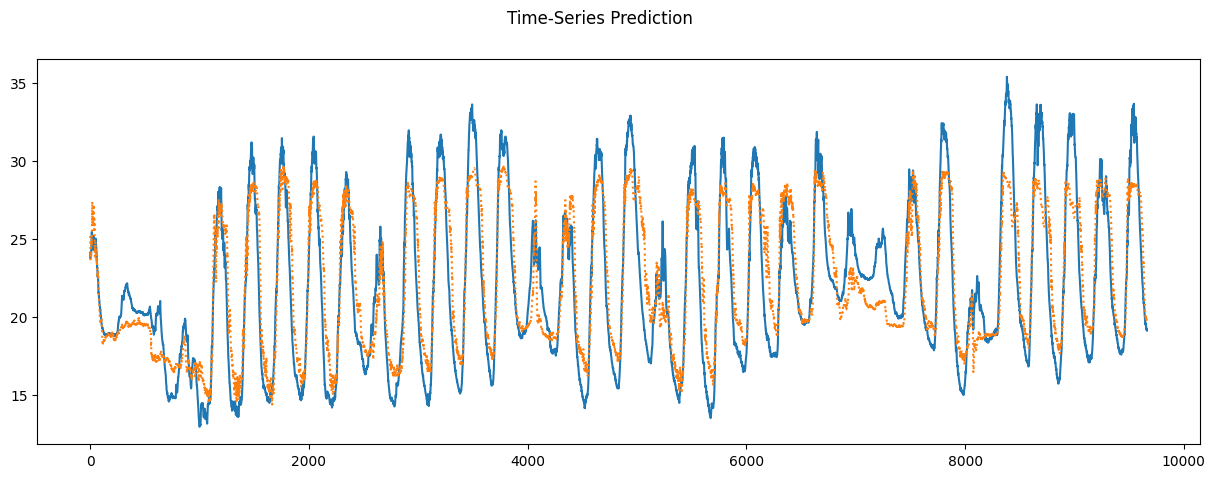

In [10]:
true_val, pred_val = modeling.eval(test_loader, data.y_test)
plot_ts_result(true_val, pred_val)

In [11]:
del modeling

분류부터 딥러닝으로 설계하는 연습을 해보자


offline reinforcement learning